In [124]:
# An Analysis of Baton Rouge Crime Statistics

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
# get matplot to show charts inline
%matplotlib inline
import plotly.graph_objects as go
import plotly.express as px

from sklearn import datasets
import seaborn as sns

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [126]:
df = pd.read_csv("Baton_Rouge_Police_Crime_Incidents.csv")
df.head(5)

C:\Users\epste\AppData\Local\Temp\ipykernel_15976\3702598438.py:1: DtypeWarning:

Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.



INCIDENT NUMBER                             CHARGE ID  \
0       19-082654  AFF2B61F-AC22-46D5-982D-3CA140D57369   
1       20-015556  8929E25E-778E-44C0-9387-70ADBD1F02C1   
2       25-176138                               3142864   
3       25-193263                               3159962   
4       25-194341                               3159746   

              CHARGE DATE             REPORT DATE           APPROVED DATE  \
0  09/08/2019 03:08:00 AM  07/14/2021 01:51:06 PM  07/29/2021 09:00:41 AM   
1  02/18/2020 02:28:00 PM  02/10/2021 10:05:30 AM  02/10/2021 02:25:17 PM   
2  07/14/2025 07:00:00 AM  07/30/2025 10:32:43 AM  09/16/2025 01:02:39 PM   
3  09/13/2025 12:00:00 AM  09/13/2025 01:44:16 PM  09/16/2025 12:59:33 PM   
4  09/16/2025 09:24:00 AM  09/16/2025 09:24:39 AM  09/16/2025 11:44:43 AM   

  ATTEMPTED OR COMMITTED         STREET ADDRESS SUBADDRESS         CITY STATE  \
0              COMMITTED                    NaN        NaN          NaN   NaN   
1              COMMITTED                    NaN        NaN          NaN   NaN   
2              COMPLETED            8425 TOM DR        NaN  BATON ROUGE    LA   
3              COMPLETED  4464 SAINT GERARD AVE        NaN  BATON ROUGE    LA   
4                    NaN       9701 AIRLINE HWY        NaN  BATON ROUGE    LA   

   ...  CRIME AGAINST NIBRS CODE      NIBRS DESCRIPTION CENSUS BLOCK GROUP  \
0  ...            NaN        NaN                    NaN                NaN   
1  ...            NaN        NaN                    NaN                NaN   
2  ...       PROPERTY        23H      ALL OTHER LARCENY                NaN   
3  ...        SOCIETY        520  WEAPON LAW VIOLATIONS                NaN   
4  ...            NaN        NaN                    NaN                NaN   

  COUNCIL DISTRICT CRIME PREVENTION DISTRICT             NEIGHBORHOOD  \
0              NaN                       NaN                      NaN   
1              NaN                       NaN                      NaN   
2              6.0                       NaN  CORTANA / VILLA DEL REY   
3              5.0                   DELMONT            DELMONT PLACE   
4              6.0                       NaN              JONES CREEK   

  LONGITUDE  LATITUDE                   GEOLOCATION  
0       NaN       NaN                           NaN  
1       NaN       NaN                           NaN  
2 -91.09948  30.46833  POINT (-91.099478 30.468333)  
3 -91.14519  30.49730  POINT (-91.145193 30.497296)  
4 -91.08025  30.43126  POINT (-91.080247 30.431264)  

[5 rows x 27 columns]

In [127]:
df.tail()

INCIDENT NUMBER CHARGE ID             CHARGE DATE  \
161590       25-170068   3156049  07/13/2025 02:00:00 AM   
161591       25-192585   3145553  09/11/2025 05:00:00 PM   
161592       25-193835   3154647  09/15/2025 12:00:00 AM   
161593       25-500642   3127146  08/26/2025 03:22:00 PM   
161594       25-191353   3151879  09/07/2025 10:00:00 AM   

                   REPORT DATE           APPROVED DATE ATTEMPTED OR COMMITTED  \
161590  07/13/2025 11:01:16 AM  09/15/2025 02:17:28 PM              COMPLETED   
161591  09/11/2025 06:31:28 PM  09/15/2025 10:54:39 AM              COMPLETED   
161592  09/15/2025 12:06:53 AM  09/15/2025 04:08:43 AM              COMPLETED   
161593  09/05/2025 08:31:00 PM  09/15/2025 01:45:46 PM              COMPLETED   
161594  09/08/2025 10:01:04 AM  09/15/2025 06:58:26 AM                    NaN   

                    STREET ADDRESS SUBADDRESS         CITY STATE  ...  \
161590         3575 N ACADIAN THWY        NaN  BATON ROUGE    LA  ...   
161591                         NaN        NaN  BATON ROUGE    LA  ...   
161592  12390 SCOTLAND-ZACHARY HWY        NaN  BATON ROUGE    LA  ...   
161593            8464 AIRLINE HWY        NaN  BATON ROUGE    LA  ...   
161594           9279 FLORIDA BLVD        NaN  BATON ROUGE    LA  ...   

        CRIME AGAINST NIBRS CODE NIBRS DESCRIPTION CENSUS BLOCK GROUP  \
161590         PERSON        13B    SIMPLE ASSAULT                NaN   
161591         PERSON        13C      INTIMIDATION                NaN   
161592       PROPERTY        23C       SHOPLIFTING                NaN   
161593       PROPERTY        23C       SHOPLIFTING                NaN   
161594            NaN        NaN               NaN                NaN   

       COUNCIL DISTRICT CRIME PREVENTION DISTRICT             NEIGHBORHOOD  \
161590              7.0                       NaN         ISTROUMA / DIXIE   
161591              2.0                       NaN            SCOTLANDVILLE   
161592              2.0                       NaN                    BAKER   
161593              6.0                       NaN       GOODWOOD HOMESITES   
161594              6.0                       NaN  CORTANA / VILLA DEL REY   

       LONGITUDE  LATITUDE                   GEOLOCATION  
161590 -91.15678  30.48125  POINT (-91.156777 30.481247)  
161591       NaN       NaN                           NaN  
161592 -91.17316  30.55820  POINT (-91.173162 30.558202)  
161593 -91.09973  30.45680  POINT (-91.099727 30.456804)  
161594 -91.08594  30.45524  POINT (-91.085942 30.455241)  

[5 rows x 27 columns]

In [128]:
df.describe()

ZIP CODE  CENSUS BLOCK GROUP  COUNCIL DISTRICT      LONGITUDE  \
count  159573.000000                 0.0     150931.000000  132382.000000   
mean    70808.452658                 NaN          7.353327     -91.130224   
std       109.077820                 NaN          2.671495       0.044749   
min     30083.000000                 NaN          1.000000     -91.930000   
25%     70805.000000                 NaN          6.000000     -91.163410   
50%     70806.000000                 NaN          7.000000     -91.141180   
75%     70814.000000                 NaN         10.000000     -91.101880   
max     79816.000000                 NaN         12.000000     -90.162200   

            LATITUDE  
count  132382.000000  
mean       30.456132  
std         0.038388  
min        29.996200  
25%        30.429900  
50%        30.456010  
75%        30.481030  
max        31.271000

In [129]:
columns = df.columns
index = df.index
data = df.values

In [130]:
columns

Index(['INCIDENT NUMBER', 'CHARGE ID', 'CHARGE DATE', 'REPORT DATE',
       'APPROVED DATE', 'ATTEMPTED OR COMMITTED', 'STREET ADDRESS',
       'SUBADDRESS', 'CITY', 'STATE', 'ZIP CODE', 'DISTRICT', 'ZONE',
       'SUBZONE', 'STATUTE TITLE', 'STATUTE DESCRIPTION', 'STATUTE CATEGORY',
       'CRIME AGAINST', 'NIBRS CODE', 'NIBRS DESCRIPTION',
       'CENSUS BLOCK GROUP', 'COUNCIL DISTRICT', 'CRIME PREVENTION DISTRICT',
       'NEIGHBORHOOD', 'LONGITUDE', 'LATITUDE', 'GEOLOCATION'],
      dtype='object')

In [131]:
index

RangeIndex(start=0, stop=161595, step=1)

In [132]:
data

array([['19-082654', 'AFF2B61F-AC22-46D5-982D-3CA140D57369',
        '09/08/2019 03:08:00 AM', ..., nan, nan, nan],
       ['20-015556', '8929E25E-778E-44C0-9387-70ADBD1F02C1',
        '02/18/2020 02:28:00 PM', ..., nan, nan, nan],
       ['25-176138', '3142864', '07/14/2025 07:00:00 AM', ..., -91.09948,
        30.46833, 'POINT (-91.099478 30.468333)'],
       ...,
       ['25-193835', '3154647', '09/15/2025 12:00:00 AM', ..., -91.17316,
        30.5582, 'POINT (-91.173162 30.558202)'],
       ['25-500642', '3127146', '08/26/2025 03:22:00 PM', ..., -91.09973,
        30.4568, 'POINT (-91.099727 30.456804)'],
       ['25-191353', '3151879', '09/07/2025 10:00:00 AM', ..., -91.08594,
        30.45524, 'POINT (-91.085942 30.455241)']],
      shape=(161595, 27), dtype=object)

In [133]:
df.shape

(161595, 27)

In [134]:
df.dtypes

INCIDENT NUMBER               object
CHARGE ID                     object
CHARGE DATE                   object
REPORT DATE                   object
APPROVED DATE                 object
ATTEMPTED OR COMMITTED        object
STREET ADDRESS                object
SUBADDRESS                    object
CITY                          object
STATE                         object
ZIP CODE                     float64
DISTRICT                      object
ZONE                          object
SUBZONE                       object
STATUTE TITLE                 object
STATUTE DESCRIPTION           object
STATUTE CATEGORY              object
CRIME AGAINST                 object
NIBRS CODE                    object
NIBRS DESCRIPTION             object
CENSUS BLOCK GROUP           float64
COUNCIL DISTRICT             float64
CRIME PREVENTION DISTRICT     object
NEIGHBORHOOD                  object
LONGITUDE                    float64
LATITUDE                     float64
GEOLOCATION                   object
d

In [135]:
df['COUNCIL DISTRICT'] = df['COUNCIL DISTRICT'].astype('Int64')
df['COUNCIL DISTRICT'] = df['COUNCIL DISTRICT'].replace([np.inf, -np.inf], np.nan)

mean_val = round(df['COUNCIL DISTRICT'].mean())
df['COUNCIL DISTRICT'] = df['COUNCIL DISTRICT'].fillna(mean_val).astype('Int64')

In [136]:
df['ZIP CODE'] = df['ZIP CODE'].astype('Int64')
df['ZIP CODE'] = df['ZIP CODE'].replace([np.inf, -np.inf], np.nan)

mean_val = round(df['ZIP CODE'].mean())
df['ZIP CODE'] = df['ZIP CODE'].fillna(mean_val).astype('Int64')

In [137]:
df.dtypes.value_counts()

object     22
float64     3
Int64       2
Name: count, dtype: int64

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161595 entries, 0 to 161594
Data columns (total 27 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   INCIDENT NUMBER            161593 non-null  object 
 1   CHARGE ID                  161595 non-null  object 
 2   CHARGE DATE                161595 non-null  object 
 3   REPORT DATE                161595 non-null  object 
 4   APPROVED DATE              161595 non-null  object 
 5   ATTEMPTED OR COMMITTED     160317 non-null  object 
 6   STREET ADDRESS             140668 non-null  object 
 7   SUBADDRESS                 4457 non-null    object 
 8   CITY                       160128 non-null  object 
 9   STATE                      160252 non-null  object 
 10  ZIP CODE                   161595 non-null  Int64  
 11  DISTRICT                   153175 non-null  object 
 12  ZONE                       153175 non-null  object 
 13  SUBZONE                    15

In [139]:
df['DISTRICT'] = df['DISTRICT'].replace('B', '6')

In [140]:
# Convert ID to numeric so "5" and "5.0" become the same number
df['DISTRICT_normalized'] = pd.to_numeric(df['DISTRICT'])
#result = df.groupby('DISTRICT_normalized')['count'].sum().reset_index()
#df['DISTRICT_normalized'] = df['DISTRICT_normalized'].astype(int)

In [141]:
df['ZONE_normalized'] = df['ZONE'].str.upper()
#result = df.groupby('ZONE_normalized').sum().reset_index()

In [142]:
df['REPORT DATE'] = pd.to_datetime(df['REPORT DATE'], format='%m/%d/%Y %I:%M:%S %p')

In [143]:
df['MONTH'] = df['REPORT DATE'].dt.month

In [144]:
df['MONTH'].unique

<bound method Series.unique of 0         7
1         2
2         7
3         9
4         9
         ..
161590    7
161591    9
161592    9
161593    9
161594    9
Name: MONTH, Length: 161595, dtype: int32>

In [145]:
df['MONTH'].value_counts()

MONTH
3     15517
4     14770
1     14760
2     13892
8     13826
11    13384
5     13150
10    13112
9     12865
7     12552
6     12039
12    11728
Name: count, dtype: int64

In [146]:
df['DAY_OF_YEAR'] = df['REPORT DATE'].dt.dayofyear

In [147]:
df['DAY_OF_YEAR'].unique

<bound method Series.unique of 0         195
1          41
2         211
3         256
4         259
         ... 
161590    194
161591    254
161592    258
161593    248
161594    251
Name: DAY_OF_YEAR, Length: 161595, dtype: int32>

In [148]:
df['DAY_OF_YEAR'].value_counts()

DAY_OF_YEAR
109    641
31     623
40     610
62     608
67     599
      ... 
358    296
212    288
176    281
359    206
366     92
Name: count, Length: 366, dtype: int64

In [149]:
df['DAY_OF_MONTH'] = df['REPORT DATE'].dt.day

In [150]:
df['DAY_OF_MONTH'].unique

<bound method Series.unique of 0         14
1         10
2         30
3         13
4         16
          ..
161590    13
161591    11
161592    15
161593     5
161594     8
Name: DAY_OF_MONTH, Length: 161595, dtype: int32>

In [151]:
df['DAY_OF_MONTH'].value_counts()

DAY_OF_MONTH
3     5592
1     5528
10    5457
14    5438
26    5427
16    5419
9     5416
12    5411
20    5406
27    5406
6     5368
7     5362
19    5359
18    5358
8     5343
28    5341
22    5330
11    5305
2     5298
13    5296
5     5246
15    5222
17    5209
25    5181
21    5162
4     5145
23    5115
24    4906
29    4767
30    4750
31    3032
Name: count, dtype: int64

In [152]:
df['HOUR_OF_DAY'] = df['REPORT DATE'].dt.strftime('%H')

In [153]:
df['HOUR_OF_DAY'].unique

<bound method Series.unique of 0         13
1         10
2         10
3         13
4         09
          ..
161590    11
161591    18
161592    00
161593    20
161594    10
Name: HOUR_OF_DAY, Length: 161595, dtype: object>

In [154]:
df['HOUR_OF_DAY'].value_counts()

HOUR_OF_DAY
13    9280
10    9278
14    9068
11    8902
12    8881
09    8830
16    8257
15    8151
17    7918
18    7917
19    7833
08    7774
21    7699
20    7559
22    6748
07    5774
23    5681
00    4918
01    4585
02    4085
03    3420
06    3332
04    3047
05    2658
Name: count, dtype: int64

In [155]:
df['DAY_OF_WEEK'] = df['REPORT DATE'].dt.day_name()

In [156]:
df['DAY_OF_WEEK'].unique

<bound method Series.unique of 0         Wednesday
1         Wednesday
2         Wednesday
3          Saturday
4           Tuesday
            ...    
161590       Sunday
161591     Thursday
161592       Monday
161593       Friday
161594       Monday
Name: DAY_OF_WEEK, Length: 161595, dtype: object>

In [157]:
df['DAY_OF_WEEK'].value_counts()

DAY_OF_WEEK
Tuesday      25818
Wednesday    25294
Monday       25172
Thursday     24585
Friday       22673
Sunday       19321
Saturday     18732
Name: count, dtype: int64

In [158]:
# Create numerical day-of-week column (Monday=0, Sunday=6)
df['DAY_OF_WEEK_NUM'] = df['REPORT DATE'].dt.dayofweek

In [159]:
df['DAY_OF_WEEK_NUM'].unique

<bound method Series.unique of 0         2
1         2
2         2
3         5
4         1
         ..
161590    6
161591    3
161592    0
161593    4
161594    0
Name: DAY_OF_WEEK_NUM, Length: 161595, dtype: int32>

In [160]:
df['DAY_OF_WEEK_NUM'].value_counts()

DAY_OF_WEEK_NUM
1    25818
2    25294
0    25172
3    24585
4    22673
6    19321
5    18732
Name: count, dtype: int64

In [161]:
df['ZIP CODE'].unique()

<IntegerArray>
[70808, 70815, 70805, 70816, 70807, 70806, 70820, 70802, 70811, 70812, 70809,
 70836, 70814, 70810, 70819, 70801, 70817, 70803, 70813, 70804, 70898, 70770,
 70818, 70785, 70791, 70714, 70726, 70782, 70767, 30083, 70502, 70739, 70783,
 70185, 70053, 70503, 70422, 70769, 70823, 77099, 70825, 70508, 71101, 79816,
 70722, 70062, 76018, 70893]
Length: 48, dtype: Int64

In [162]:
df['ZIP CODE'].value_counts()

ZIP CODE
70805    33068
70802    24198
70806    21669
70815    17393
70808    15353
70816    13196
70807    11426
70820     7137
70809     4497
70811     4075
70814     3562
70810     1694
70801     1239
70836     1196
70812      904
70819      700
70817      133
70818       39
70813       32
70803       27
70185        6
70782        5
70714        5
70791        5
70726        4
70053        4
70823        3
70898        2
70739        2
79816        2
70804        2
70785        1
77099        1
76018        1
70062        1
70722        1
71101        1
70508        1
70825        1
70422        1
70769        1
70770        1
70503        1
70783        1
70502        1
30083        1
70767        1
70893        1
Name: count, dtype: Int64

In [163]:
df['DISTRICT_normalized'] = df['DISTRICT_normalized'].astype('Int64')
df['DISTRICT_normalized'] = df['DISTRICT_normalized'].replace([np.inf, -np.inf], np.nan)

mean_val = round(df['DISTRICT_normalized'].mean())
df['DISTRICT_normalized'] = df['DISTRICT_normalized'].fillna(mean_val).astype('Int64')

df['DISTRICT_normalized'].unique()

<IntegerArray>
[3, 4, 2, 1, 5, 6]
Length: 6, dtype: Int64

In [164]:
df['DISTRICT_normalized'].value_counts()

DISTRICT_normalized
3    47312
4    39744
1    37279
2    34099
5     3158
6        3
Name: count, dtype: Int64

In [165]:
df['COUNCIL DISTRICT'].unique()

<IntegerArray>
[7, 6, 5, 2, 10, 11, 4, 12, 8, 3, 9, 1]
Length: 12, dtype: Int64

In [166]:
df['COUNCIL DISTRICT'].value_counts()

COUNCIL DISTRICT
7     45171
10    29107
6     26277
5     17444
2     11016
12    10756
8      8981
11     8404
4      2715
3      1566
9       154
1         4
Name: count, dtype: Int64

In [167]:
df['ZONE_normalized'].unique()

array([nan, '3B', '4F', '3C', '4G', '4C', '3G', '2A', '4B', '1C', '2C',
       '3D', '2D', '2B', '1D', '3E', '4D', '2E', '2F', '3A', '4A', '1B',
       '1A', '3F', '5A', '4E', '2G', '4T', 'BK', '33', '2', '3'],
      dtype=object)

In [168]:
df['ZONE_normalized'].value_counts()

ZONE_normalized
1C    14324
2C    12571
4G    12362
1D     8937
3E     8640
1B     8273
4F     7999
3G     7515
3D     6498
2B     6049
1A     5745
3F     5601
2D     5262
2E     4815
4D     4408
4C     4280
3C     4167
4B     4061
4E     3540
3A     3254
3B     3213
5A     3158
4A     3089
2A     2887
2F     2510
4T        5
2G        4
BK        3
33        3
2         1
3         1
Name: count, dtype: int64

In [214]:
unique_values = df['SUBZONE'].unique()

print(unique_values)

['3F1' '2B1' '20' '4G1' '4F1' '300000' '2C1' '1B2' '1A1' '1B1' '1C2' nan
 '4F2' '4D1' '4G3' '2C3' '300' '1C1' '1D1' '3G3' '30000' '1A3' '1D2' '3A1'
 '4G2' '2D1' '4B1' '40' '4A1' '30' '4D2' '2B2' '3F2' '2A2' '20000' '5A1'
 '4C2' '1C3' '4A2' '1A2' '3D2' '3C2' '2C2' '4C1' '3F3' '2A1' '3D3' '2000'
 '1D3' '400' '2F2' '3000' '3B1' '5A2' '3G2' '3A2' '3D1' '3B2' '3G4' '200'
 '2F1' '4B3' '2D2' '3C1' '2D3' '3G1' '3C3' '4B2' '3A3' '2B3' '200000' '3'
 '2F@' '33E' '33G' '2G1' '3C' '2A3' '4b1' '4c1' '4tB' '2a1' '1a3' '3f1'
 '4GG' '3g3' '2' '4T4' '3f2' '4c2' '1b2' '4A4' '3d2']


In [215]:
unique_values = df['CRIME PREVENTION DISTRICT'].unique()

print(unique_values)

[nan 'BROOKSTOWN' 'MELROSE EAST' 'SHERWOOD FOREST' 'CAPITAL HEIGHTS'
 'MELROSE PLACE' 'DELMONT' 'FOREST OAK WINDSOR' 'GOODWOOD HOMESITES'
 'MAYFAIR PARK - PARK EAST - HEIGHTS' 'PARK FOREST' 'BROADMOOR'
 'VILLA DEL REY' 'WEDGEWOOD' 'OLD GOODWOOD' 'SOUTHERN HEIGHTS'
 'JEFFERSON PLACE - BOCAGE' 'TARA' 'SOUTH BURBANK' 'CONCORD ESTATES'
 'RIVERBEND' 'UNIVERSITY ACRES' 'FAIRWOOD' 'FOREST HEIGHTS PARK'
 'OLD JEFFERSON' 'SHENANDOAH ESTATES' 'WESTMINSTER PINE PARK'
 'PARK FOREST EAST']


In [216]:
count = df[df['STATUTE DESCRIPTION'] == 'FIRST DEGREE MURDER'].shape[0]
print(count)


1579


In [169]:
df['NIBRS CODE'].unique()

array([nan, '23H', '520', '13B', '220', '26E', '90J', '13A', '23C', '90Z',
       '35A', '23F', '35B', '240', '13C', '23G', '290', '23D', '26A',
       '90F', '90C', '26F', '11B', '100', '120', '11A', '250', '26C',
       '26B', '11C', '90E', '280', '11D', '90H', '23A', '210', '270',
       '370', '40B', '09A', '90G', '90D', '720', '36B', '90A', '200',
       '40A', '64A', '09B', '23E', '23B', '39A', '09C', '90I', '39B',
       '510', '90B', '36A', '0'], dtype=object)

In [170]:
df['NIBRS CODE'].value_counts()

NIBRS CODE
13B    17586
290    15080
220    12854
23H    11618
13A    10500
90Z     9671
23C     9155
23F     8962
240     8232
35A     7207
520     7167
13C     3377
120     2539
90J     2529
23A     2286
23D     1753
250     1576
26A     1541
09A     1436
23G     1382
26C     1362
35B     1279
280     1149
90C     1080
26B     1008
90D      761
90E      570
100      562
11A      530
11D      475
90G      411
26E      356
270      349
26F      269
90F      215
370      176
210      150
11B      140
36B      138
23E       93
720       82
11C       78
200       77
90A       48
64A       39
23B       38
09B       32
90H       25
40B       16
40A       14
09C        7
90B        7
39A        4
510        4
36A        2
90I        1
39B        1
0          1
Name: count, dtype: int64

In [171]:
df['COUNCIL DISTRICT'].unique()

<IntegerArray>
[7, 6, 5, 2, 10, 11, 4, 12, 8, 3, 9, 1]
Length: 12, dtype: Int64

In [172]:
df['COUNCIL DISTRICT'].value_counts()

COUNCIL DISTRICT
7     45171
10    29107
6     26277
5     17444
2     11016
12    10756
8      8981
11     8404
4      2715
3      1566
9       154
1         4
Name: count, dtype: Int64

In [173]:
df['CRIME PREVENTION DISTRICT'].unique()

array([nan, 'DELMONT', 'CAPITAL HEIGHTS', 'BROOKSTOWN', 'MELROSE EAST',
       'SHERWOOD FOREST', 'FOREST OAK WINDSOR', 'BROADMOOR',
       'OLD GOODWOOD', 'PARK FOREST', 'SOUTHERN HEIGHTS',
       'GOODWOOD HOMESITES', 'WEDGEWOOD', 'VILLA DEL REY',
       'MAYFAIR PARK - PARK EAST - HEIGHTS', 'JEFFERSON PLACE - BOCAGE',
       'TARA', 'MELROSE PLACE', 'CONCORD ESTATES', 'SOUTH BURBANK',
       'RIVERBEND', 'UNIVERSITY ACRES', 'FAIRWOOD', 'OLD JEFFERSON',
       'FOREST HEIGHTS PARK', 'PARK FOREST EAST', 'SHENANDOAH ESTATES',
       'WESTMINSTER PINE PARK'], dtype=object)

In [174]:
df['CRIME PREVENTION DISTRICT'].value_counts()

CRIME PREVENTION DISTRICT
FOREST OAK WINDSOR                    4271
MELROSE EAST                          3049
SHERWOOD FOREST                       2733
DELMONT                               2215
OLD GOODWOOD                          1705
BROOKSTOWN                            1416
PARK FOREST                           1099
CAPITAL HEIGHTS                        881
BROADMOOR                              707
SOUTHERN HEIGHTS                       596
MELROSE PLACE                          575
VILLA DEL REY                          508
WEDGEWOOD                              418
MAYFAIR PARK - PARK EAST - HEIGHTS     337
GOODWOOD HOMESITES                     329
TARA                                   100
CONCORD ESTATES                         84
JEFFERSON PLACE - BOCAGE                81
RIVERBEND                               50
UNIVERSITY ACRES                        39
SOUTH BURBANK                           34
FAIRWOOD                                 3
WESTMINSTER PINE PARK       

In [175]:
df['NEIGHBORHOOD'].unique()

array([nan, 'CORTANA / VILLA DEL REY', 'DELMONT PLACE', 'JONES CREEK',
       'NORTH BATON ROUGE', 'SCOTLANDVILLE', 'TARA', 'MID CITY',
       'BROOKSTOWN', 'GOODWOOD', 'SOUTH CAMPUS', 'NORTH SHERWOOD FOREST',
       'OLD SOUTH BATON ROUGE', 'BOCAGE / CITIPLACE / CONCORD ESTATES',
       'VALLEY PARK', 'SMILEY HEIGHTS / MELROSE EAST', 'SHERWOOD FOREST',
       'GLEN OAKS / ZION CITY', 'JEFFERSON / DRUSILLA', 'STEVENDALE',
       'POLLARD / WOODCHASE', 'JEFFERSON TERRACE / INNISWOLD',
       'BROADMOOR', 'VICTORIA FARMS', 'THE AVENUES / SOUTHERN UNIV',
       'DOWNTOWN EAST', 'ISTROUMA / DIXIE', 'COLLEGE TOWN', 'CENTER CITY',
       'FAIRWOOD', 'WESTMINSTER / PINE PARK', 'CITY PARK',
       'PARK FOREST / OAKCREST', 'SOUTHSIDE', 'FAIRFIELDS',
       'UNIVERSITY ACRES / WOODSTONE', 'SOUTH BURBANK', 'EDEN PARK',
       'MAYFAIR', 'GOODWOOD HOMESITES', 'KLEINPETER', 'L S U', 'BAKER',
       "O'NEAL", 'EAST FAIRFIELDS / MELROSE PLACE', 'MONTICELLO',
       'FOREST HEIGHTS / SUNNYBROOK', 'LE

In [176]:
df['NEIGHBORHOOD'].value_counts()

NEIGHBORHOOD
NORTH BATON ROUGE                       10901
SCOTLANDVILLE                            8317
JONES CREEK                              8018
OLD SOUTH BATON ROUGE                    8008
BROOKSTOWN                               7764
SOUTH CAMPUS                             6618
MID CITY                                 6598
DELMONT PLACE                            5827
NORTH SHERWOOD FOREST                    5726
ISTROUMA / DIXIE                         5238
GLEN OAKS / ZION CITY                    4382
DOWNTOWN EAST                            4271
BOCAGE / CITIPLACE / CONCORD ESTATES     4023
SMILEY HEIGHTS / MELROSE EAST            3894
FAIRFIELDS                               3777
EAST FAIRFIELDS / MELROSE PLACE          3485
SHERWOOD FOREST                          3303
GOODWOOD HOMESITES                       3296
FAIRWOOD                                 3202
CORTANA / VILLA DEL REY                  3115
CENTER CITY                              3102
TARA                 

In [177]:
df.dtypes

INCIDENT NUMBER                      object
CHARGE ID                            object
CHARGE DATE                          object
REPORT DATE                  datetime64[ns]
APPROVED DATE                        object
ATTEMPTED OR COMMITTED               object
STREET ADDRESS                       object
SUBADDRESS                           object
CITY                                 object
STATE                                object
ZIP CODE                              Int64
DISTRICT                             object
ZONE                                 object
SUBZONE                              object
STATUTE TITLE                        object
STATUTE DESCRIPTION                  object
STATUTE CATEGORY                     object
CRIME AGAINST                        object
NIBRS CODE                           object
NIBRS DESCRIPTION                    object
CENSUS BLOCK GROUP                  float64
COUNCIL DISTRICT                      Int64
CRIME PREVENTION DISTRICT       

In [178]:
df['HOUR_OF_DAY'] = df['HOUR_OF_DAY'].astype(int)

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161595 entries, 0 to 161594
Data columns (total 35 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   INCIDENT NUMBER            161593 non-null  object        
 1   CHARGE ID                  161595 non-null  object        
 2   CHARGE DATE                161595 non-null  object        
 3   REPORT DATE                161595 non-null  datetime64[ns]
 4   APPROVED DATE              161595 non-null  object        
 5   ATTEMPTED OR COMMITTED     160317 non-null  object        
 6   STREET ADDRESS             140668 non-null  object        
 7   SUBADDRESS                 4457 non-null    object        
 8   CITY                       160128 non-null  object        
 9   STATE                      160252 non-null  object        
 10  ZIP CODE                   161595 non-null  Int64         
 11  DISTRICT                   153175 non-null  object  

In [180]:
df = df.sort_values('HOUR_OF_DAY')

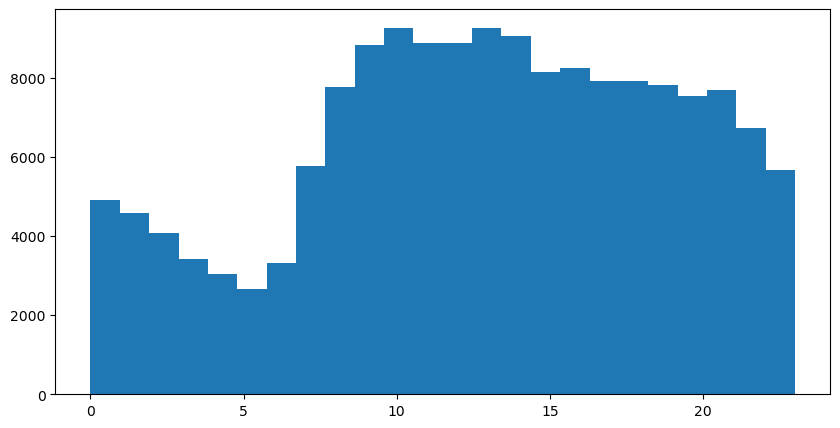

In [181]:
plt.figure(figsize = (10, 5))
plt.hist(df['HOUR_OF_DAY'],bins = 24)
plt.show()

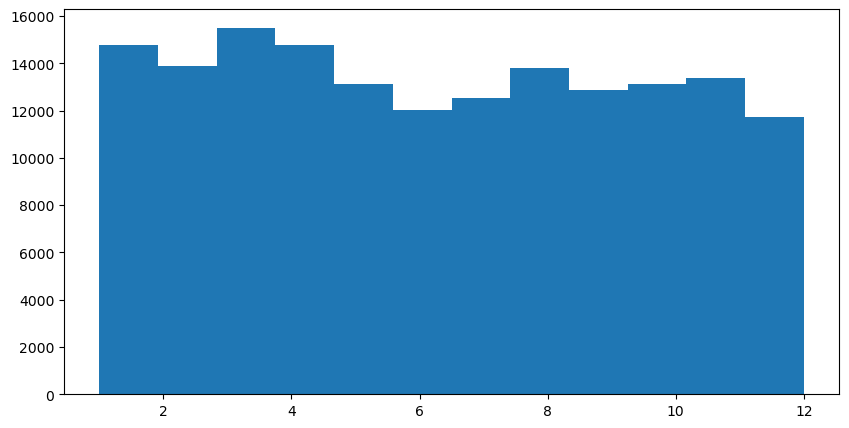

In [182]:
df.sort_values('MONTH')
plt.figure(figsize = (10, 5))
plt.hist(df['MONTH'],bins = 12)
plt.show()

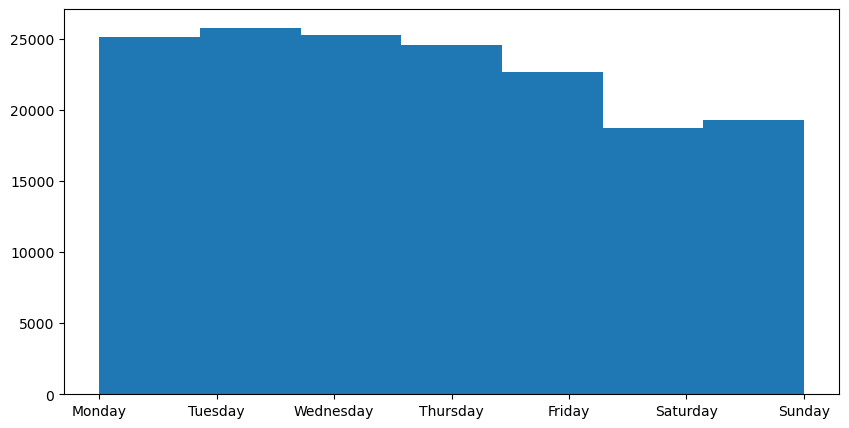

In [183]:
# Define correct order of days
weekday_order = [
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
]

# Convert column to an ordered categorical type
df['DAY_OF_WEEK'] = pd.Categorical(df['DAY_OF_WEEK'], categories=weekday_order, ordered=True)

# Now sort
df = df.sort_values('DAY_OF_WEEK')

plt.figure(figsize = (10, 5))
plt.hist(df['DAY_OF_WEEK'],bins = 7)
plt.show('DAY_OF_WEEK')

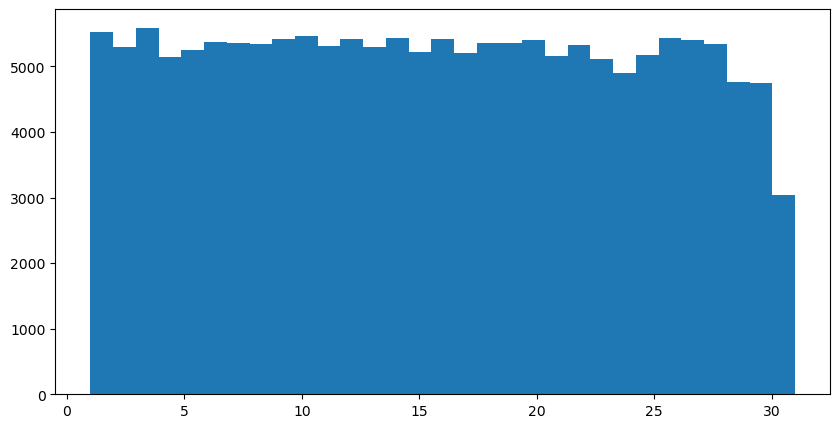

In [184]:
df.sort_values('DAY_OF_MONTH')
plt.figure(figsize = (10, 5))
plt.hist(df['DAY_OF_MONTH'],bins = 31)
plt.show()

In [185]:
df['DAY_OF_MONTH'].value_counts()

DAY_OF_MONTH
3     5592
1     5528
10    5457
14    5438
26    5427
16    5419
9     5416
12    5411
20    5406
27    5406
6     5368
7     5362
19    5359
18    5358
8     5343
28    5341
22    5330
11    5305
2     5298
13    5296
5     5246
15    5222
17    5209
25    5181
21    5162
4     5145
23    5115
24    4906
29    4767
30    4750
31    3032
Name: count, dtype: int64

In [186]:
print(df['DAY_OF_MONTH'].value_counts().sort_index())

DAY_OF_MONTH
1     5528
2     5298
3     5592
4     5145
5     5246
6     5368
7     5362
8     5343
9     5416
10    5457
11    5305
12    5411
13    5296
14    5438
15    5222
16    5419
17    5209
18    5358
19    5359
20    5406
21    5162
22    5330
23    5115
24    4906
25    5181
26    5427
27    5406
28    5341
29    4767
30    4750
31    3032
Name: count, dtype: int64


In [187]:
df['STATUTE DESCRIPTION'].value_counts()

STATUTE DESCRIPTION
THEFT                                                                      17824
SIMPLE CRIMINAL DAMAGE TO PROPERTY                                         12408
SIMPLE BURGLARY                                                            12392
SIMPLE BATTERY                                                              6525
THEFT OF GOODS (SHOPLIFTING)                                                6283
                                                                           ...  
POSS F/ARM/BREC PARK/CC                                                        1
TERRORISM - AGGRAVATED ARSON UPON ANY STRICTURE, WATERCRAFT, OR MOVABLE        1
SOLICITATION FROM ROADWAY PROHIBITED                                           1
MANUFACTURE AND POSSESSION OF A BOMB                                           1
POSS SCH 2 DRUGS                                                               1
Name: count, Length: 1178, dtype: int64

In [188]:
df['STATUTE DESCRIPTION'].unique

<bound method Series.unique of 89231               NO DRIVER'S LICENSE IN POSSESSION - 149
47549                                   FIRST DEGREE MURDER
44135                                       SIMPLE BURGLARY
76435                  ILLEGAL POSSESION OF STOLEN FIREARMS
79208     ILLEGAL USE OF WEAPONS OR DANGEROUS INSTRUMENT...
                                ...                        
109696                  UNAUTHORIZED USE OF A MOTOR VEHICLE
145833           SIMPLE BURGLARY - THEFT FROM MOTOR VEHICLE
7928                                         SIMPLE BATTERY
138665                                NO PROOF OF INSURANCE
151758                     AGGRAVATED SECOND DEGREE BATTERY
Name: STATUTE DESCRIPTION, Length: 161595, dtype: object>

In [189]:
unique_count = len(df['STATUTE DESCRIPTION'].unique())
print(unique_count)

1178


In [190]:
#print(df['STATUTE DESCRIPTION'])
#for value in df['STATUTE DESCRIPTION']:
#   print(value)

In [191]:
df['STATUTE_ID'] = pd.factorize(df['STATUTE DESCRIPTION'])[0] + 1

In [192]:
# Sort dataframe by STATUTE_ID
#df_sorted = df_unique.sort_values(by='STATUTE_ID')

# Print STATUTE_ID followed by STATUTE DESCRIPTION
#for _, row in df_sorted.iterrows():
#    print(row['STATUTE_ID'], row['STATUTE DESCRIPTION'])
#)
df_unique = df[['STATUTE DESCRIPTION', 'STATUTE_ID']].drop_duplicates()
#for value in df_unique['STATUTE DESCRIPTION']:
#    print(value)
#print(df_unique.sort_values(by='STATUTE_ID'))
# Sort dataframe by STATUTE_ID
#df_sorted = df_unique.sort_values(by='STATUTE_ID')

# Print STATUTE_ID followed by STATUTE DESCRIPTION
#for _, row in df_sorted.iterrows():
#    print(row['STATUTE_ID'],',',row['STATUTE DESCRIPTION'])


# Sort by STATUTE_ID
df_sorted = df_unique.sort_values(by='STATUTE_ID')

# Print each line: STATUTE_ID,STATUTE DESCRIPTION
#for _, row in df_sorted.iterrows():
#    print(f"{row['STATUTE_ID']},{row['STATUTE DESCRIPTION']}")

# Save to CSV file
df_sorted[['STATUTE_ID', 'STATUTE DESCRIPTION']].to_csv("BRPD.csv", index=False, header=False)


In [193]:
print(df['STATUTE DESCRIPTION'].value_counts().sort_index())

STATUTE DESCRIPTION
(ATTEMPTED) FIRST DEGREE MURDER              298
(ATTEMPTED) MANSLAUGHTER                       1
(ATTEMPTED) SECOND DEGREE MURDER             202
(ATTEMPTED)DISARMING A PEACE OFFICER           2
2 TAIL LAMPS REQUIRED                          3
                                            ... 
WHEN OVERTAKING ON THE RIGHT IS PERMITTED      1
WINDOW TINT VIOLATION                        149
WIRE-TAPPING PROHIBITED                        1
YIELD TO EMERGENCY VEHICLES                    2
YIELD/PASSING EMERGENCY VEHICLE                1
Name: count, Length: 1178, dtype: int64


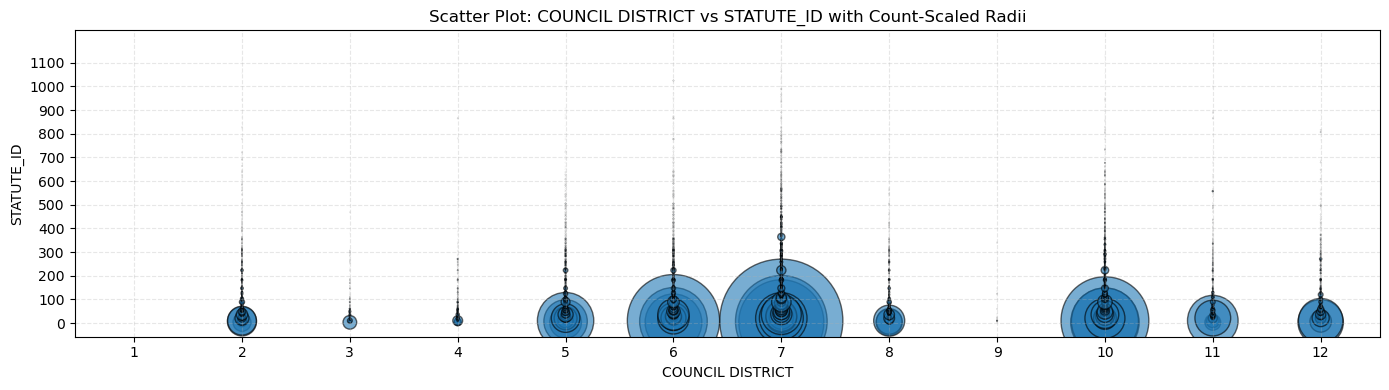

In [194]:
# 1. Count occurrences of each (COUNCIL DISTRICT, STATUTE_ID) pair
grouped = df.groupby(['COUNCIL DISTRICT', 'STATUTE_ID']).size().reset_index(name='COUNT')

# 2. Scale counts to radii between 0 and 50
min_radius, max_radius = 0, 50
count_min, count_max = grouped['COUNT'].min(), grouped['COUNT'].max()

# Avoid division by zero if all counts are equal
if count_min == count_max:
    grouped['RADIUS'] = max_radius
else:
    grouped['RADIUS'] = min_radius + (grouped['COUNT'] - count_min) * (max_radius - min_radius) / (count_max - count_min)

# Convert radius to scatter point area (area = π * r^2)
grouped['AREA'] = np.pi * grouped['RADIUS']**2

# 3. Plot
plt.figure(figsize=(14, 4))
plt.scatter(
    grouped['COUNCIL DISTRICT'],
    grouped['STATUTE_ID'],
    s=grouped['AREA'],
    alpha=0.6,
    edgecolors='black'
)

# 4. Configure axes
plt.xlabel("COUNCIL DISTRICT")
plt.ylabel("STATUTE_ID")
plt.title("Scatter Plot: COUNCIL DISTRICT vs STATUTE_ID with Count-Scaled Radii")

# X-axis: show only unique COUNCIL DISTRICT values
unique_districts = sorted(grouped['COUNCIL DISTRICT'].unique())
plt.xticks(unique_districts)

# Y-axis: tick marks every multiple of 100
y_min = grouped['STATUTE_ID'].min()
y_max = grouped['STATUTE_ID'].max()
plt.yticks(np.arange(y_min - y_min % 100, y_max + 10, 100))

plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


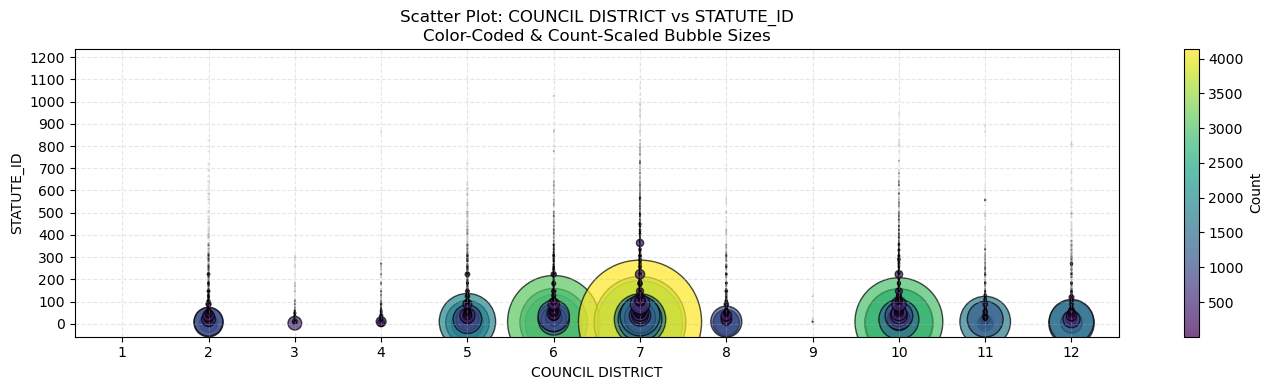

In [195]:
# 1. Count occurrences of each (COUNCIL DISTRICT, STATUTE_ID) pair
grouped = df.groupby(['COUNCIL DISTRICT', 'STATUTE_ID']).size().reset_index(name='COUNT')

# 2. Scale counts to radii between 0 and 50
min_radius, max_radius = 0, 50
count_min, count_max = grouped['COUNT'].min(), grouped['COUNT'].max()

# Avoid division by zero if all counts are equal
if count_min == count_max:
    grouped['RADIUS'] = max_radius
else:
    grouped['RADIUS'] = min_radius + (grouped['COUNT'] - count_min) * \
                        (max_radius - min_radius) / (count_max - count_min)

# Convert radius → area (A = πr²)
grouped['AREA'] = np.pi * grouped['RADIUS']**2

# 3. Plot
plt.figure(figsize=(14, 4))
scatter = plt.scatter(
    grouped['COUNCIL DISTRICT'],
    grouped['STATUTE_ID'],
    s=grouped['AREA'],
    c=grouped['COUNT'],            # Color by count values
    cmap='viridis',                # Color map
    alpha=0.7,
    edgecolors='black'
)

# 4. Add a colorbar to show count values
cbar = plt.colorbar(scatter)
cbar.set_label("Count")

# 5. Configure axes
plt.xlabel("COUNCIL DISTRICT")
plt.ylabel("STATUTE_ID")
plt.title("Scatter Plot: COUNCIL DISTRICT vs STATUTE_ID\nColor-Coded & Count-Scaled Bubble Sizes")

# X-axis: unique COUNCIL DISTRICT values
unique_districts = sorted(grouped['COUNCIL DISTRICT'].unique())
plt.xticks(unique_districts)

# Y-axis: tick marks every multiple of 100
y_min = grouped['STATUTE_ID'].min()
y_max = grouped['STATUTE_ID'].max()
plt.yticks(np.arange(y_min - y_min % 100, y_max + 100, 100))

plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


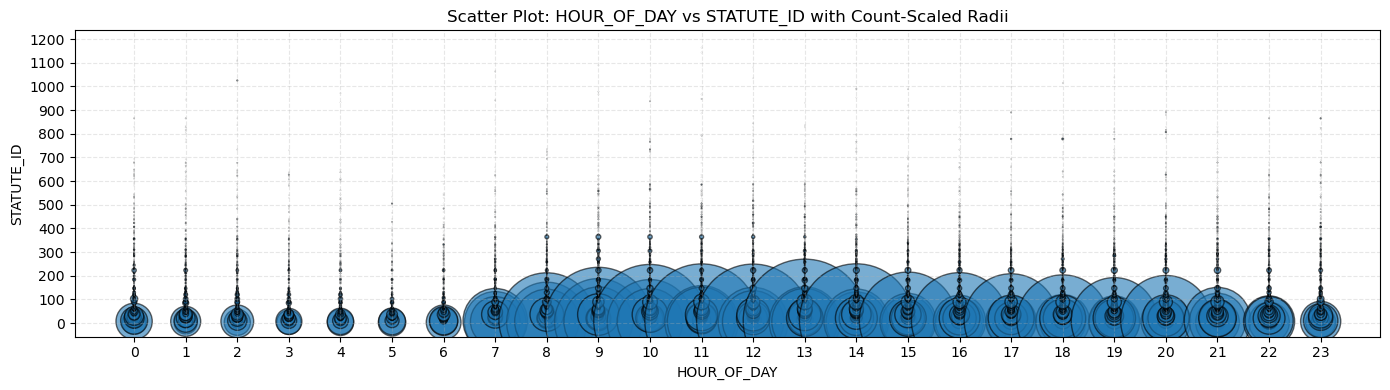

In [196]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Count occurrences of each (HOUR_OF_DAY, STATUTE_ID) pair
grouped = df.groupby(['HOUR_OF_DAY', 'STATUTE_ID']).size().reset_index(name='COUNT')

# 2. Scale counts to radii between 0 and 50
min_radius, max_radius = 0, 50
count_min, count_max = grouped['COUNT'].min(), grouped['COUNT'].max()

# Avoid division by zero if all counts are identical
if count_min == count_max:
    grouped['RADIUS'] = max_radius
else:
    grouped['RADIUS'] = min_radius + (grouped['COUNT'] - count_min) * \
                        (max_radius - min_radius) / (count_max - count_min)

# Convert radius → area for matplotlib (A = πr²)
grouped['AREA'] = np.pi * grouped['RADIUS']**2

# 3. Plot
plt.figure(figsize=(14, 4))
plt.scatter(
    grouped['HOUR_OF_DAY'],
    grouped['STATUTE_ID'],
    s=grouped['AREA'],
    alpha=0.6,
    edgecolors='black'
)

# 4. Configure axes
plt.xlabel("HOUR_OF_DAY")
plt.ylabel("STATUTE_ID")
plt.title("Scatter Plot: HOUR_OF_DAY vs STATUTE_ID with Count-Scaled Radii")

# X-axis: show all hour values (0–23) present in the dataset
unique_hours = sorted(grouped['HOUR_OF_DAY'].unique())
plt.xticks(unique_hours)

# Y-axis: tick marks at every multiple of 100
y_min = grouped['STATUTE_ID'].min()
y_max = grouped['STATUTE_ID'].max()
plt.yticks(np.arange(y_min - y_min % 100, y_max + 100, 100))

plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


In [197]:
# 1. Count occurrences of each combination
grouped = df.groupby(
    ['HOUR_OF_DAY', 'STATUTE_ID', 'COUNCIL DISTRICT']
).size().reset_index(name='COUNT')

# 2. Scale counts to radii between 0 and 50
min_radius, max_radius = 0, 50
count_min, count_max = grouped['COUNT'].min(), grouped['COUNT'].max()

if count_min == count_max:
    grouped['RADIUS'] = max_radius
else:
    grouped['RADIUS'] = min_radius + (grouped['COUNT'] - count_min) * \
                        (max_radius - min_radius) / (count_max - count_min)

# Plotly uses marker.size as diameter, not area.
# Convert intended radius to an equivalent "size" scale (multiply by 2)
grouped['MARKER_SIZE'] = grouped['RADIUS'] * 2

# 3. Create interactive 3D scatter plot
fig = go.Figure(data=[
    go.Scatter3d(
        x=grouped['HOUR_OF_DAY'],
        y=grouped['STATUTE_ID'],
        z=grouped['COUNCIL DISTRICT'],
        mode='markers',
        marker=dict(
            size=grouped['MARKER_SIZE'],
            color=grouped['COUNT'],
            colorscale='Viridis',
            opacity=0.75,
            line=dict(width=1, color='black')
        ),
        hovertemplate=
            "HOUR_OF_DAY: %{x}<br>" +
            "STATUTE_ID: %{y}<br>" +
            "COUNCIL DISTRICT: %{z}<br>" +
            "Count: %{marker.color}<extra></extra>"
    )
])

# 4. Axis settings
fig.update_layout(
    title="Interactive 3D Scatter Plot: HOUR_OF_DAY vs STATUTE_ID vs COUNCIL DISTRICT",
    scene=dict(
        xaxis=dict(
            title="HOUR_OF_DAY",
            tickmode='array',
            tickvals=sorted(grouped['HOUR_OF_DAY'].unique())
        ),
        yaxis=dict(
            title="STATUTE_ID",
            tickmode='array',
            tickvals=list(range(
                grouped['STATUTE_ID'].min() - grouped['STATUTE_ID'].min() % 10,
                grouped['STATUTE_ID'].max() + 10,
                10
            ))
        ),
        zaxis=dict(
            title="COUNCIL DISTRICT"
        )
    ),
    width=1100,
    height=800
)

fig.show()


C:\Users\epste\AppData\Local\Temp\ipykernel_15976\253634959.py:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



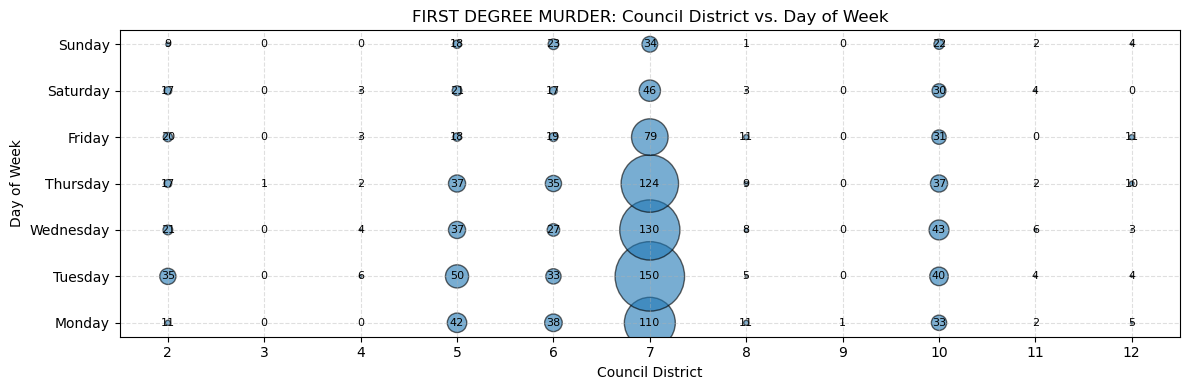

In [198]:
# Filter the dataframe
df_murder = df[df['STATUTE DESCRIPTION'] == 'FIRST DEGREE MURDER']

# Count occurrences of each district–day pair
counts = (
    df_murder.groupby(['COUNCIL DISTRICT', 'DAY_OF_WEEK'])
    .size()
    .reset_index(name='COUNT')
)

# Scale counts to radii between 0 and 50
min_r, max_r = 0, 50
cmin, cmax = counts['COUNT'].min(), counts['COUNT'].max()

if cmin == cmax:  # avoid divide-by-zero if all counts identical
    counts['RADIUS'] = max_r
else:
    counts['RADIUS'] = (
        (counts['COUNT'] - cmin) / (cmax - cmin) * (max_r - min_r) + min_r
    )

# Convert radius → matplotlib area for bubble size
sizes = counts['RADIUS'] ** 2

plt.figure(figsize=(12, 4))

plt.scatter(
    counts['COUNCIL DISTRICT'],
    counts['DAY_OF_WEEK'],
    s=sizes,
    alpha=0.6,
    edgecolors='black'
)

# Add text labels with raw count values
for _, row in counts.iterrows():
    plt.text(
        row['COUNCIL DISTRICT'],
        row['DAY_OF_WEEK'],
        str(row['COUNT']),
        ha='center',
        va='center',
        fontsize=8,
        color='black'
    )

# Axis labeling
plt.xlabel('Council District')
plt.ylabel('Day of Week')
plt.title('FIRST DEGREE MURDER: Council District vs. Day of Week')

# Force individual increments for x and y based on unique values
plt.xticks(sorted(counts['COUNCIL DISTRICT'].unique()))
plt.yticks(sorted(counts['DAY_OF_WEEK'].unique()))

plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


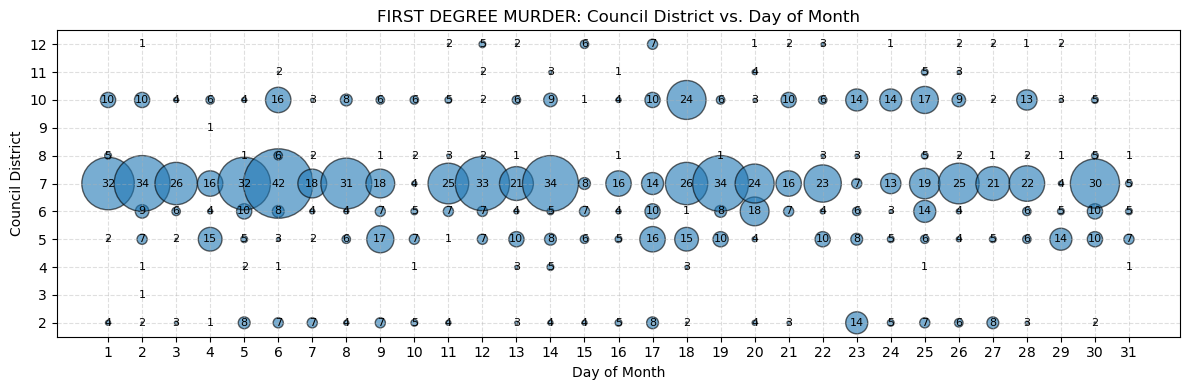

In [199]:
# Filter the dataframe
df_murder = df[df['STATUTE DESCRIPTION'] == 'FIRST DEGREE MURDER']

# Count occurrences of each district–day-of-month pair
counts = (
    df_murder.groupby(['COUNCIL DISTRICT', 'DAY_OF_MONTH'])
    .size()
    .reset_index(name='COUNT')
)

# Scale counts to radii between 0 and 50
min_r, max_r = 0, 50
cmin, cmax = counts['COUNT'].min(), counts['COUNT'].max()

if cmin == cmax:  # avoid divide-by-zero
    counts['RADIUS'] = max_r
else:
    counts['RADIUS'] = (
        (counts['COUNT'] - cmin) / (cmax - cmin) * (max_r - min_r) + min_r
    )

# Convert radius to matplotlib bubble size (area)
sizes = counts['RADIUS'] ** 2

plt.figure(figsize=(12, 4))

plt.scatter(
    counts['DAY_OF_MONTH'],
    counts['COUNCIL DISTRICT'],    
    s=sizes,
    alpha=0.6,
    edgecolors='black'
)

# Add count labels at each bubble
for _, row in counts.iterrows():
    plt.text(
        row['DAY_OF_MONTH'],
        row['COUNCIL DISTRICT'],
        str(row['COUNT']),
        ha='center',
        va='center',
        fontsize=8,
        color='black'
    )

# Axis labels and title
plt.ylabel('Council District')
plt.xlabel('Day of Month')
plt.title('FIRST DEGREE MURDER: Council District vs. Day of Month')

# Force individual increment ticks
plt.yticks(sorted(counts['COUNCIL DISTRICT'].unique()))
plt.xticks(sorted(counts['DAY_OF_MONTH'].unique()))

plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


C:\Users\epste\AppData\Local\Temp\ipykernel_15976\365590082.py:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



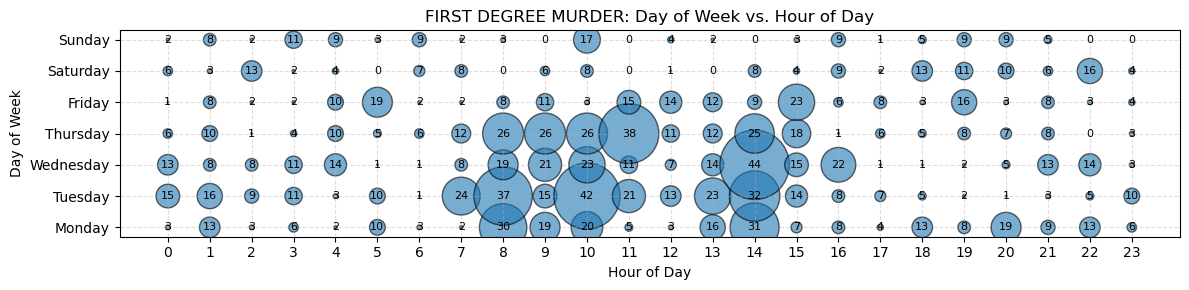

In [200]:
# Filter the dataframe
df_murder = df[df['STATUTE DESCRIPTION'] == 'FIRST DEGREE MURDER']

# Count occurrences of each day-of-week × hour pair
counts = (
    df_murder.groupby(['DAY_OF_WEEK', 'HOUR_OF_DAY'])
    .size()
    .reset_index(name='COUNT')
)

# Scale counts to radii between 0 and 50
min_r, max_r = 0, 50
cmin, cmax = counts['COUNT'].min(), counts['COUNT'].max()

if cmin == cmax:  # avoid divide-by-zero in scaling
    counts['RADIUS'] = max_r
else:
    counts['RADIUS'] = (
        (counts['COUNT'] - cmin) / (cmax - cmin) * (max_r - min_r) + min_r
    )

# Convert radius to matplotlib bubble size (area)
sizes = counts['RADIUS'] ** 2

plt.figure(figsize=(12, 3))

plt.scatter(
    counts['HOUR_OF_DAY'],
    counts['DAY_OF_WEEK'],
    s=sizes,
    alpha=0.6,
    edgecolors='black'
)

# Add count labels at each bubble
for _, row in counts.iterrows():
    plt.text(
        row['HOUR_OF_DAY'],
        row['DAY_OF_WEEK'],
        str(row['COUNT']),
        ha='center',
        va='center',
        fontsize=8,
        color='black'
    )

# Axis labels and title
plt.ylabel('Day of Week')
plt.xlabel('Hour of Day')
plt.title('FIRST DEGREE MURDER: Day of Week vs. Hour of Day')

# Force ticks to show every unique day and hour
plt.yticks(sorted(counts['DAY_OF_WEEK'].unique()))
plt.xticks(sorted(counts['HOUR_OF_DAY'].unique()))

plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


In [201]:
# Filter for FIRST DEGREE MURDER
df_murder = df[df['STATUTE DESCRIPTION'] == 'FIRST DEGREE MURDER']

# Count occurrences by day of week and hour of day
counts = (
    df_murder.groupby(['DAY_OF_WEEK', 'HOUR_OF_DAY'])
    .size()
    .reset_index(name='COUNT')
)

# Scale counts → radii (0–50)
min_r, max_r = 0, 50
cmin, cmax = counts['COUNT'].min(), counts['COUNT'].max()

if cmin == cmax:      # avoid divide-by-zero
    counts['RADIUS'] = max_r
else:
    counts['RADIUS'] = (
        (counts['COUNT'] - cmin) / (cmax - cmin) * (max_r - min_r) + min_r
    )

# Plotly uses marker size as AREA, so convert: size = radius²
counts['SIZE'] = counts['RADIUS'] ** 2

# Interactive bubble chart
fig = px.scatter(
    counts,
    x="DAY_OF_WEEK",
    y="HOUR_OF_DAY",
    size="SIZE",
    size_max=60,  # controls visual max size (optional)
    color="COUNT",  # optional heat-scale effect
    hover_data={"COUNT": True, "DAY_OF_WEEK": True, "HOUR_OF_DAY": True},
    labels={
        "DAY_OF_WEEK": "Day of Week",
        "HOUR_OF_DAY": "Hour of Day",
        "COUNT": "Count"
    },
    title="FIRST DEGREE MURDER: Day of Week vs Hour of Day (Interactive Bubble Plot)"
)

# Force axes to show individual increments
fig.update_xaxes(
    type='category',
    title="Day of Week"
)

fig.update_yaxes(
    tickmode='linear',
    dtick=1,
    title="Hour of Day"
)

fig.update_traces(mode='markers+text', 
                  text=counts["COUNT"],
                  textposition="middle center",
                  textfont=dict(size=10, color="black"))

fig.update_layout(
    width=900,
    height=600,
    showlegend=False
)

fig.show()


C:\Users\epste\AppData\Local\Temp\ipykernel_15976\2115287741.py:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



C:\Users\epste\AppData\Local\Temp\ipykernel_15976\1539708299.py:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



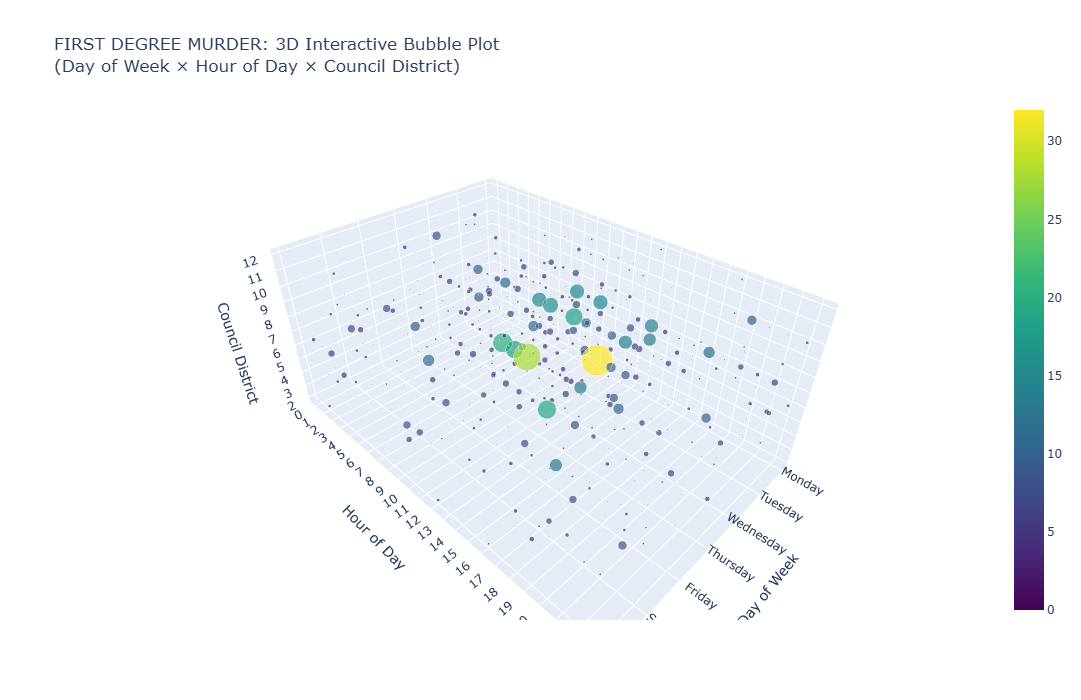

In [202]:
# Filter for FIRST DEGREE MURDER
df_murder = df[df['STATUTE DESCRIPTION'] == 'FIRST DEGREE MURDER']

# Count occurrences of each (day, hour, district)
counts = (
    df_murder.groupby(['DAY_OF_WEEK', 'HOUR_OF_DAY', 'COUNCIL DISTRICT'])
    .size()
    .reset_index(name='COUNT')
)

# Scale counts to radii between 0 and 50
min_r, max_r = 0, 50
cmin, cmax = counts['COUNT'].min(), counts['COUNT'].max()

if cmin == cmax:   # avoid divide-by-zero
    counts['RADIUS'] = max_r
else:
    counts['RADIUS'] = (
        (counts['COUNT'] - cmin) / (cmax - cmin) * (max_r - min_r) + min_r
    )

# Plotly uses marker size as area → size = radius²
counts['SIZE'] = counts['RADIUS'] ** 2

# Create 3D scatter plot
fig = go.Figure(data=[
    go.Scatter3d(
        x=counts['DAY_OF_WEEK'],
        y=counts['HOUR_OF_DAY'],
        z=counts['COUNCIL DISTRICT'],
        mode='markers+text',
#        text=counts['COUNT'],             # label count values
        textposition='middle center',
        marker=dict(
            size=counts['SIZE'],
            sizemode='area',
            opacity=0.7,
            color=counts['COUNT'],        # color scale by count
            colorscale='Viridis',
            showscale=True,
        ),
        hovertemplate=(
            "Day of Week: %{x}<br>"
            "Hour of Day: %{y}<br>"
            "Council District: %{z}<br>"
            "Count: %{text}<extra></extra>"
        )
    )
])

# Axis formatting
fig.update_layout(
    title="FIRST DEGREE MURDER: 3D Interactive Bubble Plot<br>"
          "(Day of Week × Hour of Day × Council District)",
    scene=dict(
        xaxis=dict(
            title="Day of Week",
            tickmode='array',
            tickvals=sorted(counts['DAY_OF_WEEK'].unique())
        ),
        yaxis=dict(
            title="Hour of Day",
            tickmode='array',
            tickvals=sorted(counts['HOUR_OF_DAY'].unique())
        ),
        zaxis=dict(
            title="Council District",
            tickmode='array',
            tickvals=sorted(counts['COUNCIL DISTRICT'].unique())
        ),
    ),
    width=1000,
    height=700
)

fig.show()


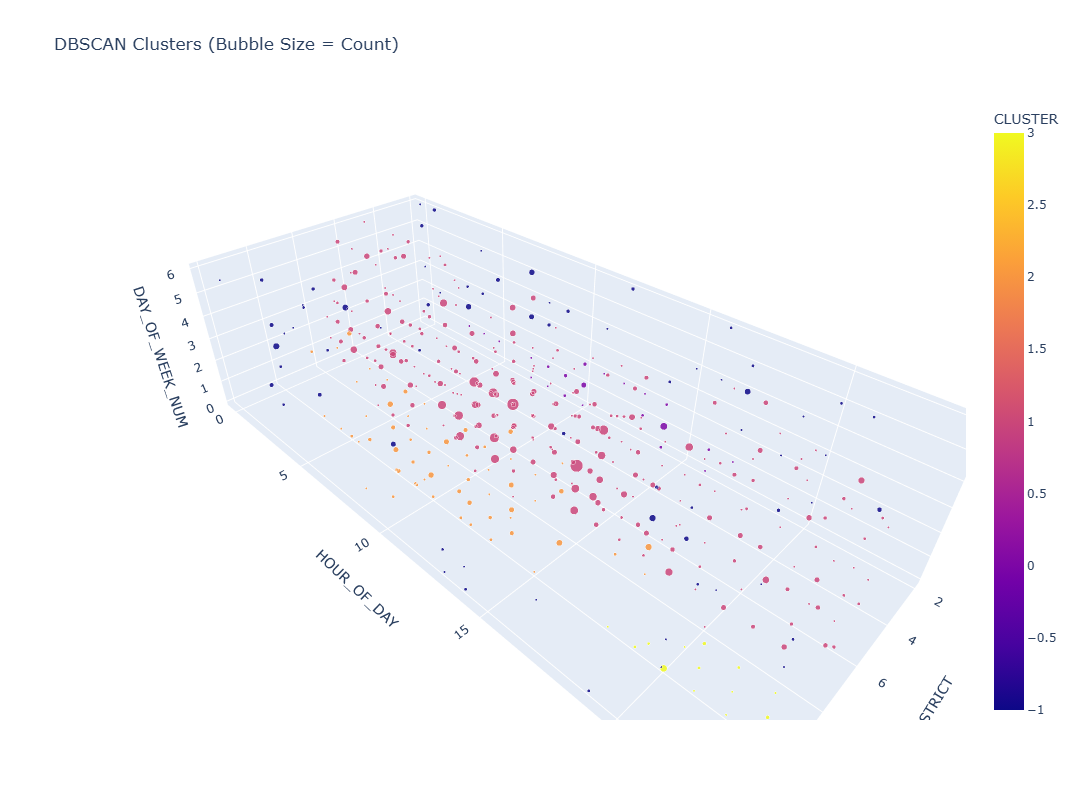

In [208]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import plotly.express as px

# -------------------------------------------------------
# 1. GROUP BY so bubble size is based on count
# -------------------------------------------------------
df_grouped = (
    df1m.groupby(['COUNCIL DISTRICT', 'HOUR_OF_DAY', 'DAY_OF_WEEK_NUM'])
        .size()
        .reset_index(name='COUNT')
)

# -------------------------------------------------------
# 2. Prepare data for DBSCAN
# -------------------------------------------------------
X = df_grouped[['COUNCIL DISTRICT', 'HOUR_OF_DAY', 'DAY_OF_WEEK_NUM']]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -------------------------------------------------------
# 3. Run DBSCAN
# -------------------------------------------------------
db = DBSCAN(eps=0.7, min_samples=10)
clusters = db.fit_predict(X_scaled)

# Add cluster labels
df_grouped['CLUSTER'] = clusters

# -------------------------------------------------------
# 4. Interactive 3D bubble plot with explicit plot size
# -------------------------------------------------------
fig = px.scatter_3d(
    df_grouped,
    x='COUNCIL DISTRICT',
    y='HOUR_OF_DAY',
    z='DAY_OF_WEEK_NUM',
    color='CLUSTER',
    size='COUNT',
    hover_data=['COUNT'],
    title="DBSCAN Clusters (Bubble Size = Count)"
)

# Explicitly define the plot size
fig.update_layout(
    width=1200,   # set width here
    height=800    # set height here
)

fig.update_traces(marker=dict(opacity=0.85))

fig.show()
